In [0]:
# Importing necessary package
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [17]:
# Loading train set
df_train = pd.read_csv('train_csv.csv')
# Loading test set
df_test= pd.read_csv('test_csv.csv')
# Printing shape of train set
print(df_train.shape)
# Printing first five rows of train set
df_train.head(5)

(80, 3)


,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [18]:
# Converting "time" columns to datetime format and storing into a new column "Timestamp"
df_train["Timestamp"] = pd.to_datetime(df_train.time,format='%Y-%m-%d %H:%M:%S')
# Setting the "Timestamp" column as dataframe index
df_train.set_index("Timestamp", inplace=True)
# Dropping the irrelivent columns
df_train.drop(["id","time"], inplace=True, axis=1)
# Printing the first five rows of modified train set
df_train.head(5)

,feature
Timestamp,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


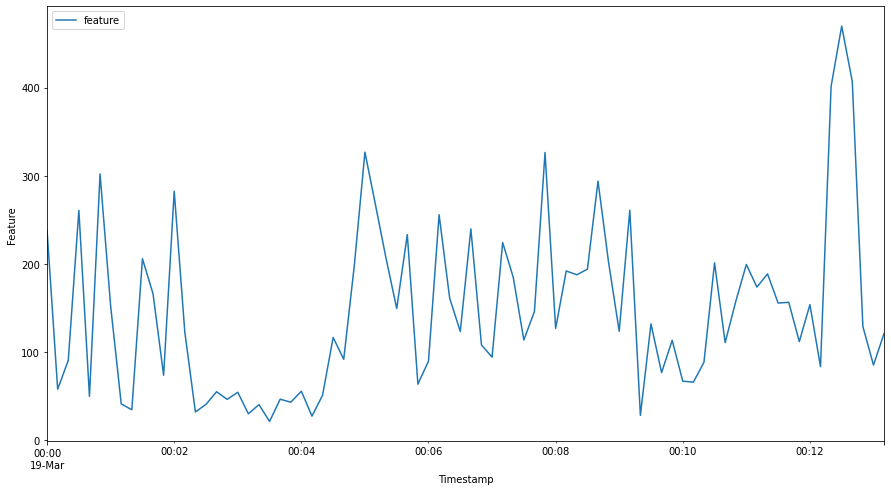

In [19]:
# Plotting for train set
df_train.plot(figsize=(15,8))
plt.xlabel("Timestamp")
plt.ylabel("Feature")
plt.show()

In [20]:
# Printing the shape of test set
print(df_test.shape)
# Printing first five rows of test set
df_test.head()

(40, 2)


,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [21]:
# Converting "time" columns to datetime format and storing into a new column "Timestamp"
df_test.Timestamp = pd.to_datetime(df_test.time,format='%Y-%m-%d %H:%M:%S')
# Setting the "Timestamp" column as dataframe index
df_test.index = df_test.Timestamp
# Dropping the irrelivent columns
df_test.drop(["id","time"], inplace=True, axis=1)
# Printing the first five rows of modified test set
df_test.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


""
time
2019-03-19 00:13:20
2019-03-19 00:13:30
2019-03-19 00:13:40
2019-03-19 00:13:50
2019-03-19 00:14:00


In [28]:
import statsmodels.api as sm

# Model Creation
model = sm.tsa.statespace.SARIMAX(df_train.feature, order=(2, 1, 4),seasonal_order=(0,1,1,7))
# Model Fitting
model_fit = model.fit(disp=0)
# Printing Model Summary
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                           feature   No. Observations:                   80
Model:             SARIMAX(2, 1, 4)x(0, 1, 1, 7)   Log Likelihood                -430.918
Date:                           Fri, 12 Jun 2020   AIC                            877.836
Time:                                   08:53:06   BIC                            896.050
Sample:                               03-19-2019   HQIC                           885.087
                                    - 03-19-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6525      0.228      2.865      0.004       0.206       1.099
ar.L2         -0.6916      0.143     -4.824

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [29]:
# Model Predictions on Test Set
predictions = pd.DataFrame(model_fit.predict(start=df_test.index[0], end=df_test.index[-1], dynamic=True), columns = ['PredictedFeature'])
predictions

,PredictedFeature
2019-03-19 00:13:20,92.265266
2019-03-19 00:13:30,176.920608
2019-03-19 00:13:40,324.179576
2019-03-19 00:13:50,268.777418
2019-03-19 00:14:00,137.425000
2019-03-19 00:14:10,103.749139
2019-03-19 00:14:20,173.678026
2019-03-19 00:14:30,214.483650
2019-03-19 00:14:40,220.484808
2019-03-19 00:14:50,267.519405


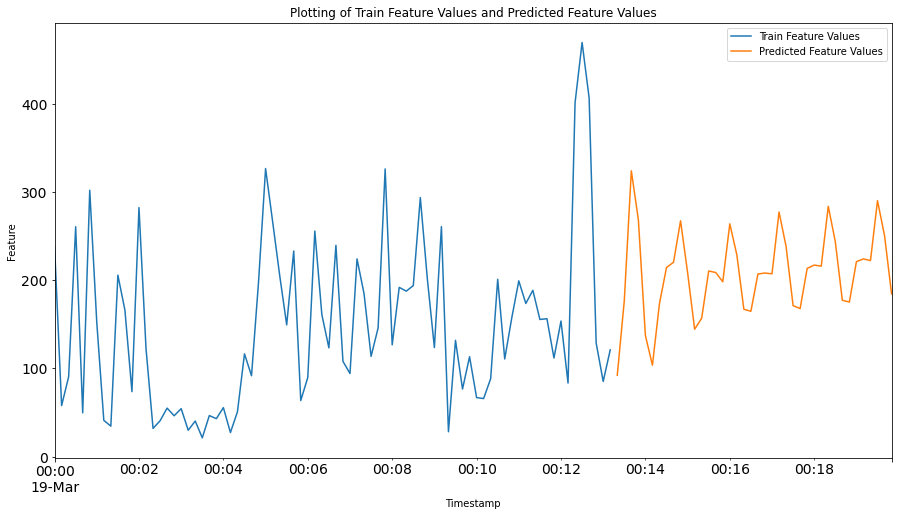

In [31]:
# Plotting data
df_train.feature.plot(figsize=(15,8), fontsize=14)
predictions.PredictedFeature.plot(figsize=(15,8), fontsize=14)
plt.xlabel("Timestamp")
plt.ylabel("Feature")
plt.title("Plotting of Train Feature Values and Predicted Feature Values")
plt.legend(['Train Feature Values','Predicted Feature Values'])
plt.show()

# Since actual feature values for test is not there so we can calculate RMSE because calcuation of RMSE requires both predicted value as well as actual value